In [42]:
import pandas as pd
from plotting import CandlePlot
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [3]:
df_ma_res = pd.read_pickle('../data/ma_res.pkl')
df_ma_trades = pd.read_pickle('../data/ma_trades.pkl')

In [5]:
print(df_ma_res.columns)
print(df_ma_trades.columns)

Index(['pair', 'num_trades', 'total_gain', 'mean_gain', 'max_gain', 'min_gain',
       'ma_l', 'ma_s', 'cross', 'granularity'],
      dtype='object')
Index(['time', 'volume', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h',
       'bid_l', 'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c', 'MA_100', 'MA_5',
       'MA_200', 'MA_10', 'MA_50', 'MA_20', 'DELTA', 'DELTA_PREV', 'TRADE',
       'DIFF', 'GAIN', 'pair', 'granularity', 'CUM_GAIN', 'ma_l', 'ma_s',
       'cross'],
      dtype='object')


In [7]:
df_ma_res.head()

,pair,num_trades,total_gain,mean_gain,max_gain,min_gain,ma_l,ma_s,cross,granularity
0,EUR_USD,35,101,2,150,-55,MA_20,MA_5,MA_5-MA_20,H1
1,EUR_USD,33,2,0,158,-131,MA_20,MA_10,MA_10-MA_20,H1
2,EUR_USD,21,-124,-5,173,-62,MA_50,MA_5,MA_5-MA_50,H1
3,EUR_USD,19,-441,-23,133,-141,MA_50,MA_10,MA_10-MA_50,H1
4,EUR_USD,15,-280,-18,162,-113,MA_50,MA_20,MA_20-MA_50,H1


In [8]:
df_ma_trades.head()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,MA_100,MA_5,MA_200,MA_10,MA_50,MA_20,DELTA,DELTA_PREV,TRADE,DIFF,GAIN,pair,granularity,CUM_GAIN,ma_l,ma_s,cross
0,2024-10-15 10:00:00+00:00,5154,1.09138,1.09150,1.09028,1.09028,1.09130,1.09142,1.09020,1.09021,1.09146,1.09158,1.09035,1.09035,1.092939,1.090364,1.096143,1.090089,1.091884,1.090329,0.000035,-0.000247,1,-0.00133,-13.3,EUR_USD,H1,-13.3,MA_20,MA_5,MA_5-MA_20
1,2024-10-15 16:00:00+00:00,4357,1.08992,1.09025,1.08894,1.08895,1.08984,1.09017,1.08887,1.08887,1.08999,1.09033,1.08901,1.08903,1.092590,1.090222,1.095746,1.090378,1.091467,1.090275,-0.000053,0.000081,-1,0.00049,-4.9,EUR_USD,H1,-18.2,MA_20,MA_5,MA_5-MA_20
2,2024-10-16 11:00:00+00:00,5359,1.08900,1.08958,1.08868,1.08944,1.08891,1.08951,1.08861,1.08936,1.08908,1.08965,1.08876,1.08951,1.091571,1.088894,1.094388,1.088835,1.089869,1.088834,0.000060,-0.000299,1,-0.00220,-22.0,EUR_USD,H1,-40.2,MA_20,MA_5,MA_5-MA_20
3,2024-10-16 15:00:00+00:00,6885,1.08798,1.08800,1.08662,1.08724,1.08790,1.08793,1.08653,1.08717,1.08805,1.08807,1.08670,1.08731,1.091365,1.088510,1.094093,1.088534,1.089602,1.088745,-0.000235,0.000044,-1,-0.00291,29.1,EUR_USD,H1,-11.1,MA_20,MA_5,MA_5-MA_20
4,2024-10-18 05:00:00+00:00,2735,1.08406,1.08442,1.08385,1.08433,1.08398,1.08434,1.08378,1.08425,1.08414,1.08450,1.08392,1.08441,1.088045,1.083930,1.091607,1.083472,1.085602,1.083597,0.000333,-0.000030,1,0.00091,9.1,EUR_USD,H1,-2.0,MA_20,MA_5,MA_5-MA_20


In [9]:
print(df_ma_res.shape[0])
print(df_ma_trades.shape[0])

220
3446


In [13]:
# Let's look at the unique pairs
print("Unique pairs are: ", len(df_ma_res.pair.unique()))
print("Unique crosses are: ", len(df_ma_res.cross.unique()))

Unique pairs are:  10
Unique crosses are:  11


#### Let's first look only to H1 granularity

In [19]:
df_ma_res_h1 = df_ma_res[df_ma_res['granularity'] == 'H1'].copy()
df_ma_trades_h1 = df_ma_trades[df_ma_trades['granularity'] == 'H1'].copy()

In [20]:
print(df_ma_res_h1.shape[0])
print(df_ma_trades_h1.shape[0])

110
1879


In [21]:
# Let's do some grouping
df_ma_res_h1.columns

Index(['pair', 'num_trades', 'total_gain', 'mean_gain', 'max_gain', 'min_gain',
       'ma_l', 'ma_s', 'cross', 'granularity'],
      dtype='object')

In [22]:
columns = ['pair', 'num_trades', 'total_gain', 'cross']
df_cross_summary_h1 = df_ma_res_h1[columns].copy()

In [25]:
df_cross_gr = df_cross_summary_h1.groupby(['cross'], as_index=False).sum()
df_cross_gr.sort_values(by='total_gain', ascending=False, inplace=True)
df_cross_gr.drop(columns=['pair'], inplace=True)

In [29]:
df_cross_gr.head()

,cross,num_trades,total_gain
1,MA_10-MA_20,323,-22
8,MA_5-MA_20,371,-541
4,MA_20-MA_100,90,-1170
0,MA_10-MA_100,109,-1243
3,MA_10-MA_50,170,-1253


In [31]:
# Let's look which crosses are the most profitable
temp = df_ma_res_h1[df_ma_res_h1['cross'] == 'MA_10-MA_20'].copy()
temp.shape[0]

10

In [32]:
temp.head()

,pair,num_trades,total_gain,mean_gain,max_gain,min_gain,ma_l,ma_s,cross,granularity
1,EUR_USD,33,2,0,158,-131,MA_20,MA_10,MA_10-MA_20,H1
12,EUR_JPY,41,-280,-6,134,-124,MA_20,MA_10,MA_10-MA_20,H1
23,EUR_GBP,32,74,2,75,-60,MA_20,MA_10,MA_10-MA_20,H1
34,EUR_AUD,27,253,9,212,-87,MA_20,MA_10,MA_10-MA_20,H1
45,USD_JPY,31,-87,-2,273,-210,MA_20,MA_10,MA_10-MA_20,H1


In [36]:
pg = temp[temp['total_gain'] > 0]
pg.head()

,pair,num_trades,total_gain,mean_gain,max_gain,min_gain,ma_l,ma_s,cross,granularity
1,EUR_USD,33,2,0,158,-131,MA_20,MA_10,MA_10-MA_20,H1
23,EUR_GBP,32,74,2,75,-60,MA_20,MA_10,MA_10-MA_20,H1
34,EUR_AUD,27,253,9,212,-87,MA_20,MA_10,MA_10-MA_20,H1
67,GBP_JPY,31,403,13,223,-141,MA_20,MA_10,MA_10-MA_20,H1
89,AUD_USD,33,31,0,86,-57,MA_20,MA_10,MA_10-MA_20,H1


In [37]:
# Let's do for all crosses
total_pairs = len(df_ma_res_h1.pair.unique())
for c in df_ma_res_h1.cross.unique():
    temp = df_ma_res_h1[df_ma_res_h1['cross'] == c].copy()
    pg = temp[temp['total_gain'] > 0].shape[0]
    print(f"cross: {c}, pg: {pg} perc gain: {(pg / total_pairs) * 100:.2f}%")

cross: MA_5-MA_20, pg: 4 perc gain: 40.00%
cross: MA_10-MA_20, pg: 5 perc gain: 50.00%
cross: MA_5-MA_50, pg: 2 perc gain: 20.00%
cross: MA_10-MA_50, pg: 2 perc gain: 20.00%
cross: MA_20-MA_50, pg: 2 perc gain: 20.00%
cross: MA_5-MA_100, pg: 1 perc gain: 10.00%
cross: MA_10-MA_100, pg: 2 perc gain: 20.00%
cross: MA_20-MA_100, pg: 1 perc gain: 10.00%
cross: MA_5-MA_200, pg: 2 perc gain: 20.00%
cross: MA_10-MA_200, pg: 2 perc gain: 20.00%
cross: MA_20-MA_200, pg: 2 perc gain: 20.00%


In [44]:
df_ma_res_h1_10_20 = df_ma_res_h1[df_ma_res_h1['cross'] == 'MA_10-MA_20'].copy()
df_ma_res_h1_10_20 = df_ma_res_h1_10_20[df_ma_res_h1_10_20['total_gain'] > 0]
df_ma_res_h1_10_20.sort_values(by='total_gain', ascending=False, inplace=True)

In [45]:
df_ma_res_h1_10_20

,pair,num_trades,total_gain,mean_gain,max_gain,min_gain,ma_l,ma_s,cross,granularity
67,GBP_JPY,31,403,13,223,-141,MA_20,MA_10,MA_10-MA_20,H1
34,EUR_AUD,27,253,9,212,-87,MA_20,MA_10,MA_10-MA_20,H1
23,EUR_GBP,32,74,2,75,-60,MA_20,MA_10,MA_10-MA_20,H1
89,AUD_USD,33,31,0,86,-57,MA_20,MA_10,MA_10-MA_20,H1
1,EUR_USD,33,2,0,158,-131,MA_20,MA_10,MA_10-MA_20,H1


In [61]:
def plot_cum_gain(df_trades, pair_name):
    plt.figure(figsize=(12, 6))  # Set figure size

    # Set black background
    plt.style.use('dark_background')

    # Plot the data
    df_trades['CUM_GAIN'].plot(
        color='cyan',       # Bright color for the line
        linewidth=2,        # Thicker line for visibility
        alpha=0.8,          # Slight transparency
        label='Gain'
    )

    # Add a horizontal line at y=0
    plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.5, label='Zero Level')

    # Add titles and labels with contrasting colors
    plt.title(f'Gain Over Time {pair_name}', fontsize=16, color='white')
    plt.xlabel('Time', fontsize=14, color='white')
    plt.ylabel('Gain', fontsize=14, color='white')

    # Customize ticks
    plt.xticks(fontsize=12, color='white')
    plt.yticks(fontsize=12, color='white')

    # Add a legend
    plt.legend(fontsize=12, facecolor='black', edgecolor='white')

    # Add grid lines with contrasting color
    plt.grid(color='gray', linestyle='--', alpha=0.3)

    # Show the plot
    plt.show()


In [53]:
#df_ma_trades_h1[(df_ma_trades_h1['cross'] == 'MA_10-MA_20') & (df_ma_trades_h1['pair'] == 'GBP_JPY')].head()
cross = 'MA_10-MA_20'
df_gain = df_ma_trades_h1[(df_ma_trades_h1['cross'] == cross) & (df_ma_trades_h1.pair =="GBP_JPY")].copy()

In [54]:
df_gain.head()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,MA_100,MA_5,MA_200,MA_10,MA_50,MA_20,DELTA,DELTA_PREV,TRADE,DIFF,GAIN,pair,granularity,CUM_GAIN,ma_l,ma_s,cross
1113,2024-10-15 19:00:00+00:00,11350,195.078,195.089,194.931,195.022,195.062,195.075,194.914,195.006,195.094,195.104,194.947,195.038,194.90034,195.1706,194.372305,195.2067,195.20404,195.20665,0.00005,-0.05215,1,-0.004,-0.4,GBP_JPY,H1,-0.4,MA_20,MA_10,MA_10-MA_20
1114,2024-10-16 00:00:00+00:00,11559,194.785,195.034,194.708,195.018,194.766,195.020,194.685,194.999,194.804,195.050,194.730,195.036,194.89608,194.9974,194.435620,195.0840,195.21404,195.10380,-0.01980,0.00185,-1,-0.102,10.2,GBP_JPY,H1,9.8,MA_20,MA_10,MA_10-MA_20
1115,2024-10-17 12:00:00+00:00,20662,194.624,195.106,194.558,194.916,194.607,195.079,194.539,194.899,194.641,195.182,194.576,194.933,194.89930,194.6100,194.576445,194.4344,194.66814,194.38060,0.05380,-0.01550,1,0.210,21.0,GBP_JPY,H1,30.8,MA_20,MA_10,MA_10-MA_20
1116,2024-10-18 17:00:00+00:00,7601,194.904,195.170,194.885,195.126,194.888,195.154,194.868,195.114,194.921,195.187,194.901,195.137,195.01501,195.0476,194.799365,195.3056,194.94246,195.35290,-0.04730,0.01730,-1,0.216,-21.6,GBP_JPY,H1,9.2,MA_20,MA_10,MA_10-MA_20
1117,2024-10-21 12:00:00+00:00,14132,195.184,195.444,195.153,195.342,195.174,195.431,195.141,195.329,195.194,195.460,195.165,195.354,194.94040,195.2964,194.891205,195.0824,195.20500,195.05315,0.02925,-0.00845,1,0.662,66.2,GBP_JPY,H1,75.4,MA_20,MA_10,MA_10-MA_20


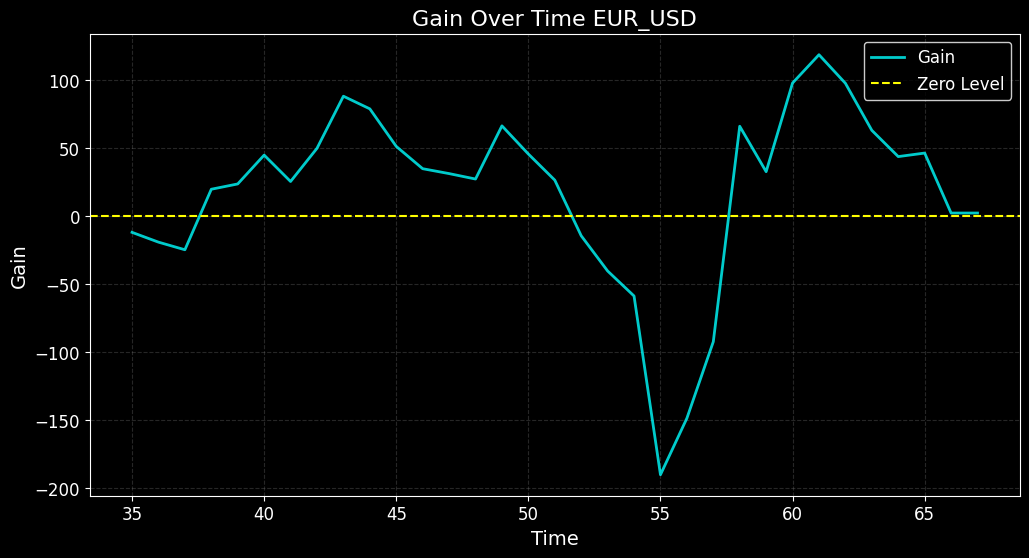

In [62]:
plot_cum_gain(df_gain, "EUR_USD")

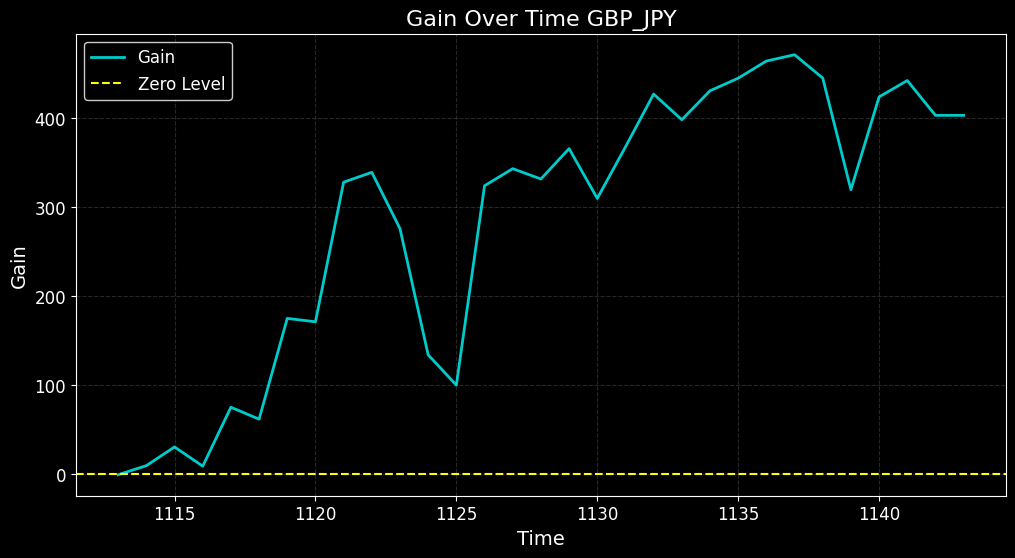

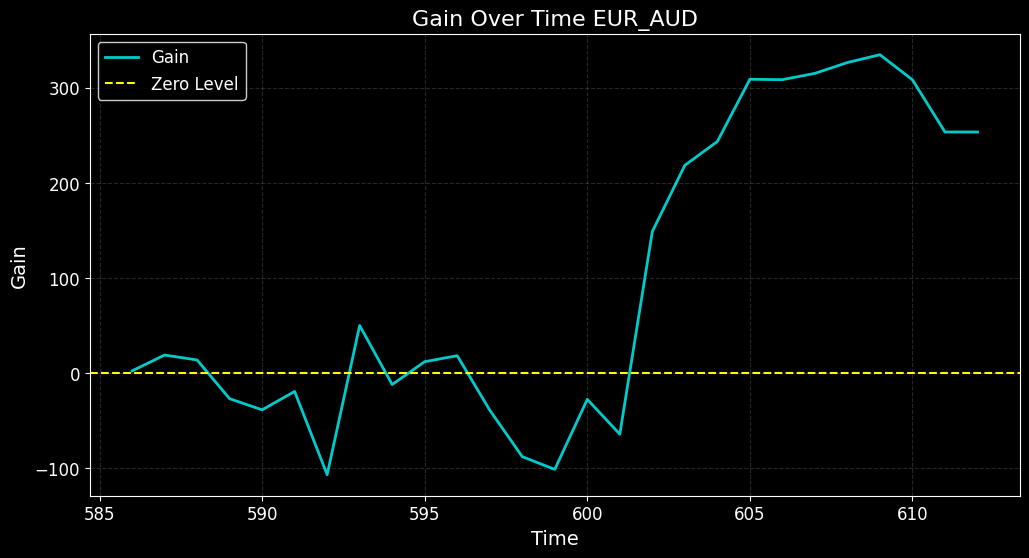

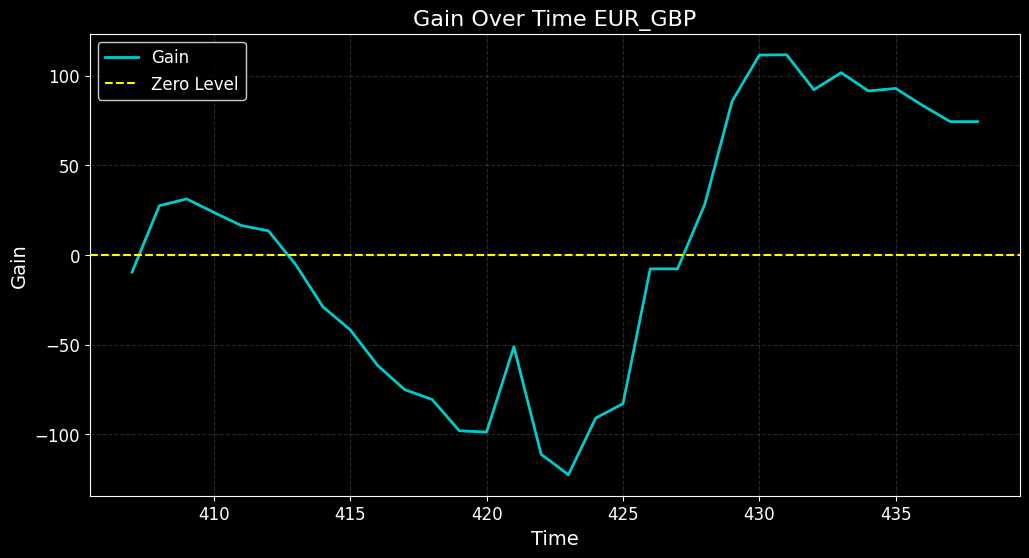

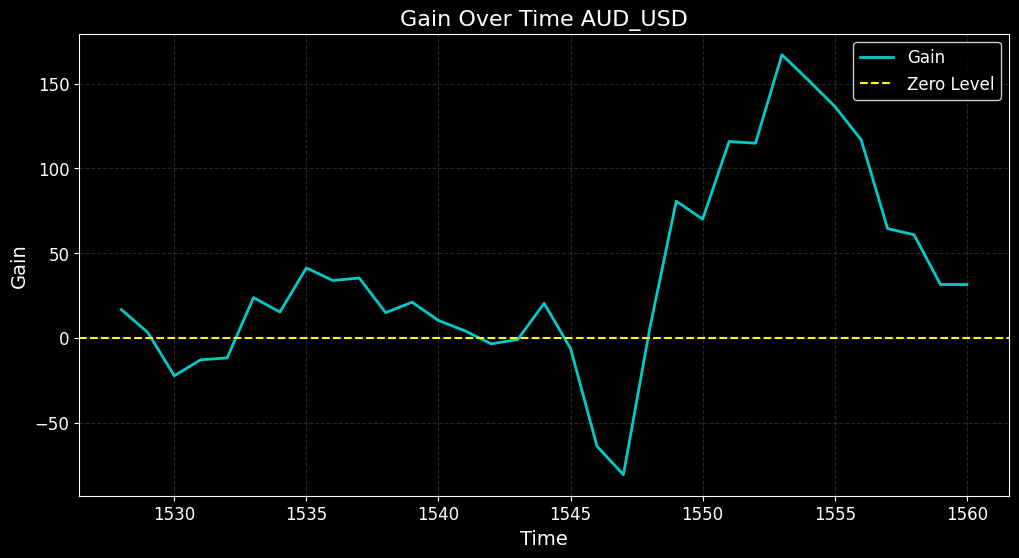

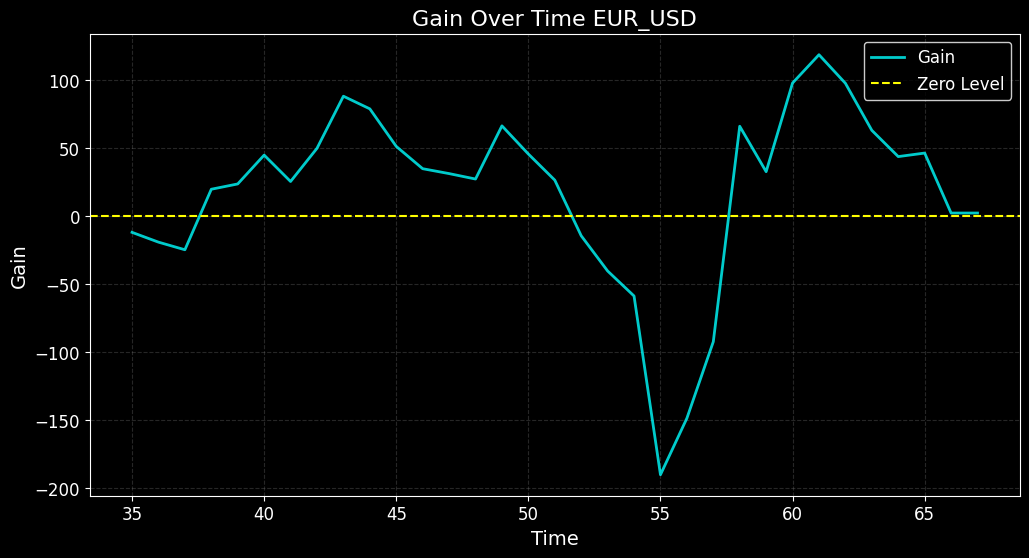

In [63]:
# Let's do this for all currency in this cross
for curr in df_ma_res_h1_10_20.pair.unique():
    df_gain = df_ma_trades_h1[(df_ma_trades_h1['cross'] == 'MA_10-MA_20') & (df_ma_trades_h1.pair == curr)].copy()
    plot_cum_gain(df_gain, curr)